In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# reading the files for the analysis
cityOrig = pd.read_csv('city_data.csv')
rideOrig = pd.read_csv('ride_data.csv')

In [16]:
# combine the data into a single data set
combo = pd.merge(cityOrig, rideOrig, on='city')
combo.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [17]:
# filtering for urban cities and calculating total rides and average fares
urban = combo.loc[(combo['type'] == 'Urban')]
u_totRides = urban.groupby(['city']) ['ride_id'].count()
u_avgFare = urban.groupby(['city']) ['fare'].mean()
u_drivers = urban.groupby(['city']) ['driver_count'].sum()

urban.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


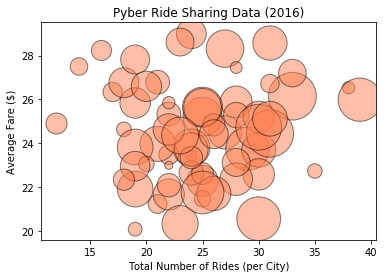

In [23]:
urban_plt = plt.scatter(u_totRides, u_avgFare, s=u_drivers, alpha=.5, color='coral',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show(urban_plt)

In [18]:
# filtering for suburban cities and calculating total rides and average fares
burbs = combo.loc[(combo['type'] == 'Suburban')]
s_totRides = burbs.groupby(['city']) ['ride_id'].count()
s_avgFare = burbs.groupby(['city']) ['fare'].mean()
s_drivers = burbs.groupby(['city']) ['driver_count'].sum()

burbs.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


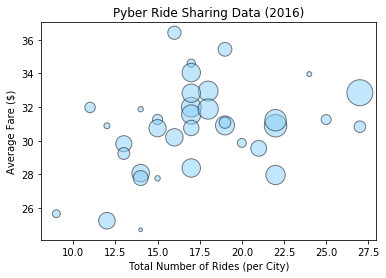

In [25]:
burb_plt = plt.scatter(s_totRides, s_avgFare, s=s_drivers, alpha=.5, color='lightskyblue',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show(burb_plt)

In [26]:
# filtering for rural cities and calculating total rides and average fares
rural = combo.loc[(combo['type'] == 'Rural')]
r_totRides = rural.groupby(['city']) ['ride_id'].count()
r_avgFare = rural.groupby(['city']) ['fare'].mean()
r_drivers = rural.groupby(['city']) ['driver_count'].sum()

rural.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


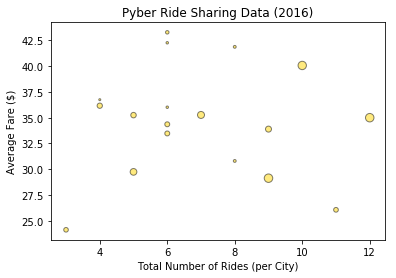

In [27]:
rural_plt = plt.scatter(r_totRides, r_avgFare, s=r_drivers, alpha=.5, color='gold',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show(rural_plt)

In [29]:
# combine plots
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
# set up for bubble chart
u_grp = pd.DataFrame({'Total Rides': u_totRides, 'Average Fare': u_avgFare})
s_grp = pd.DataFrame({'Total Rides': s_totRides, 'Average Fare': s_avgFare})
r_grp = pd.DataFrame({'Total Rides': r_totRides, 'Average Fare': r_avgFare})

data = (u_grp, s_grp, r_grp)
colors = ('coral', 'lightskyblue', 'gold')
groups = ('Urban', 'Suburban', 'Rural')
areas = (rural['driver_count'], burbs['driver_count'], rural['driver_count'])

# create the bubble chart
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for data, color, group, area in zip(data, colors, groups, areas):
    x,y = data
    ax.scatter(x, y, alpha=0.5, c=color, edgecolors='black', s=area)

plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(loc="upper right")
plt.show()

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [6]:
cityGrp = combo.groupby(['type','city'])
urban = cityGrp.loc[(cityGrp['type'] == 'Urban')]
display(urban)
totRides = cityGrp['ride_id'].count()
avgFare = cityGrp['fare'].mean()
numDrivers = cityGrp['driver_count'].sum()

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

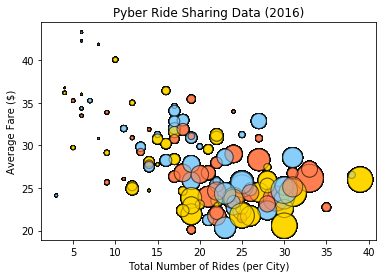

In [20]:
# creating containers for the x, y, s values for scatter
# need to figure out the color situation - bookmarked names of colors >> how to assign to city_type??? 
# may need to pull in each city type separately and then combine into one scatter - yes

x = []
y = []
area = []

for data in cityGrp:
    x.append(totRides)
    y.append(avgFare)
    area.append(numDrivers / 3)


plt.scatter(x, y, s=area, alpha=.5, color=['gold','lightskyblue','coral'],edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()

In [35]:
# creating containers for the x, y, s values for scatter
# need to figure out the color situation - bookmarked names of colors >> how to assign to city_type??? 
# may need to pull in each city type separately and then combine into one scatter - yes
t_totRides = combo['ride_id'].count()
t_avgFare = combo['fare'].mean()
t_numDrivers = combo['driver_count'].sum()

x_urban = []
y_urban = []
area_urban = []

for data in combo:
    print(data)
#     if data['type'] == 'Urban':
#         x_urban.append(t_totRides)
#         y_urban.append(t_avgFare)
#         area_urban.append(t_numDrivers / 3)

# urban, = plt.scatter(x_urban, y_urban, s=area_urban, alpha=.5, color='coral', edgecolors='black')
# #suburban, = plt.plot()
# #rural, = plt.plot()
# #plt.scatter(x, y, s=area, alpha=.5, color=['gold','lightskyblue','coral'],edgecolors='black')
# plt.xlabel("Total Number of Rides (per City)")
# plt.ylabel("Average Fare ($)")
# plt.title("Pyber Ride Sharing Data (2016)")
# plt.legend(loc="upper right")
# plt.show()

city
driver_count
type
date
fare
ride_id
